In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt

In [24]:
venue_dict = {}
# read csv data
df = pd.read_csv('RVF_ATX_PID_HZ_Places_Lookup.tsv', sep='\t')
# only keep the venueid and level1cat
df = df[['venueid', 'level1cat']]
# iterate the create a dictionary of venueid and level1cat

for index, row in tqdm(df.iterrows()):
    if row['venueid'] not in venue_dict:
        venue_dict[row['venueid']] = row['level1cat']

101210it [00:03, 28467.70it/s]


In [ ]:
venue_dict = {}
# read csv data
df = pd.read_csv('RVF_ATX_PID_HZ_Places_Lookup.tsv', sep='\t')
# only keep the venueid and level1cat
df = df[['venueid', 'level1cat']]
# iterate the create a dictionary of venueid and level1cat

for index, row in tqdm(df.iterrows()):
    if row['venueid'] not in venue_dict:
        venue_dict[row['venueid']] = row['level1cat']

101210it [00:03, 28467.70it/s]


In [28]:
def get_location_distribution(df):
    dwell_time_threshold = 60
    df = df.drop(columns=['local_date', 'local_hour', 'gender', 'age', 'full_panel_reweighted_sag_score', 'home_zip'])
    df = df[(df['dwell'] >= dwell_time_threshold)]
    # get the location distribution
    location_count = {}

    for index, row in tqdm(df.iterrows()):
        venueid = row['venueid']
        venuecat = venue_dict[venueid]
        if venuecat not in location_count:
            location_count[venuecat] = 1
        else:
            location_count[venuecat] += 1
    # plot the keys and values sorted by values
    data = sorted(location_count.items(), key=lambda x: x[1], reverse=True)
    x, y = zip(*data)
    plt.figure(figsize=(20, 10))
    plt.bar(x, y)
    plt.xticks(rotation=90)
    plt.show()
    

599106it [00:18, 33085.89it/s]


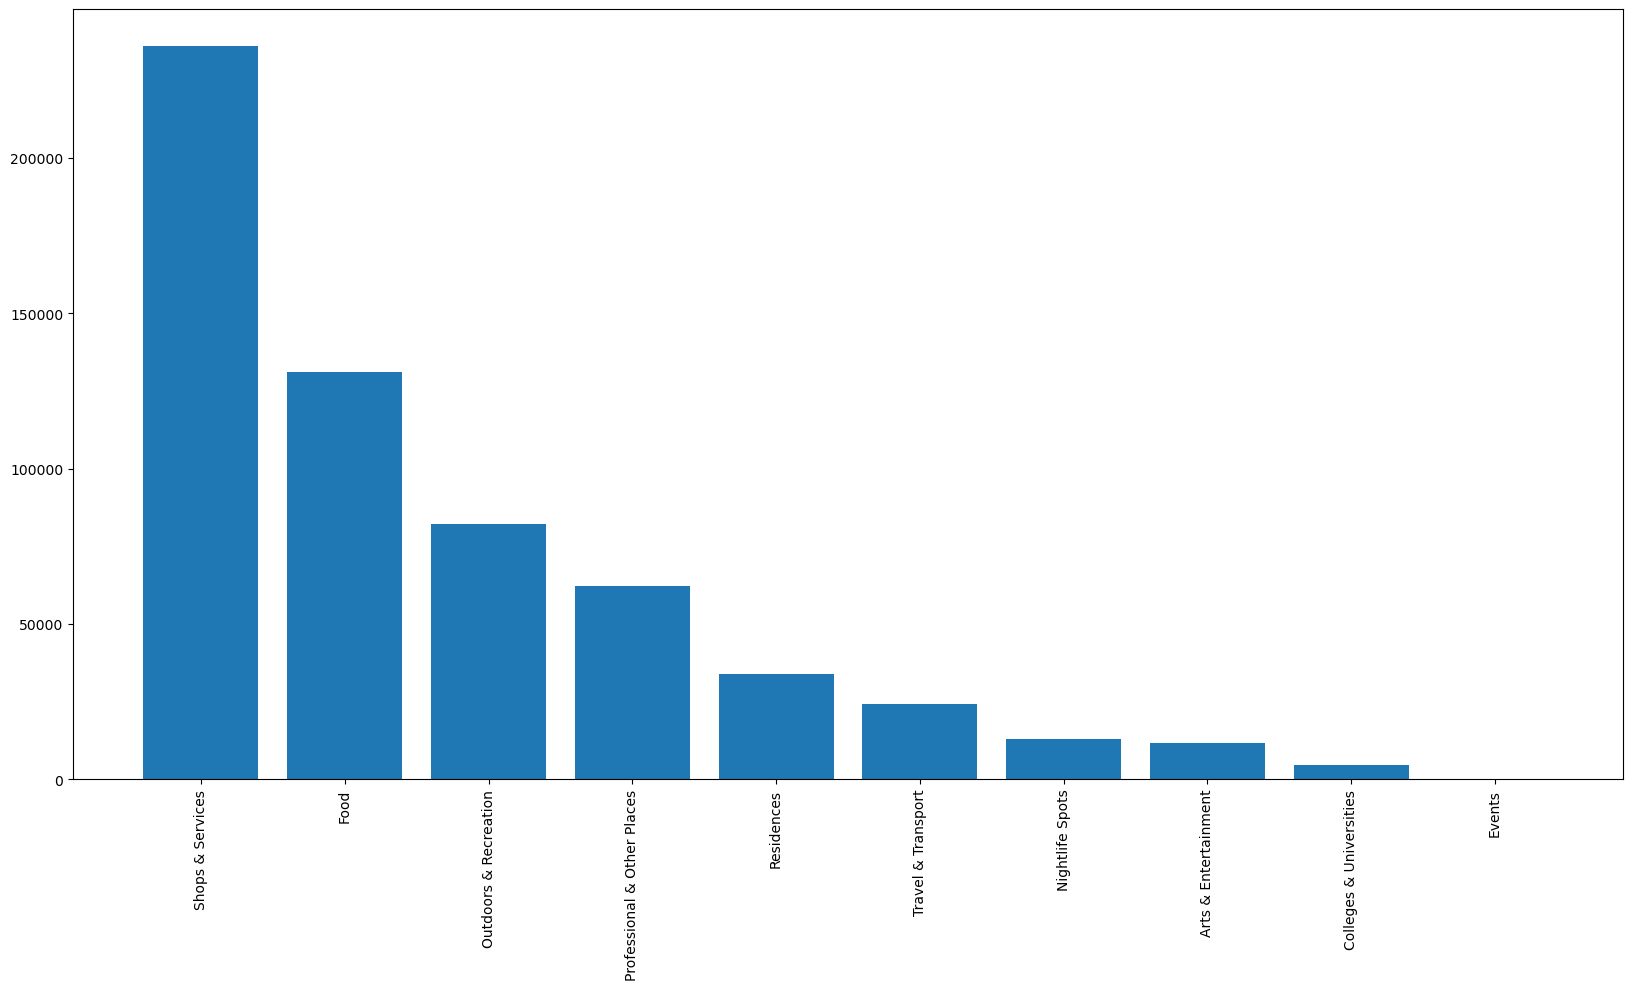

In [31]:
july_df = pd.read_csv('RVF_ATX_PID_HZ-2020-07.tsv', sep='\t')
get_location_distribution(july_df)

893752it [00:26, 33512.83it/s]


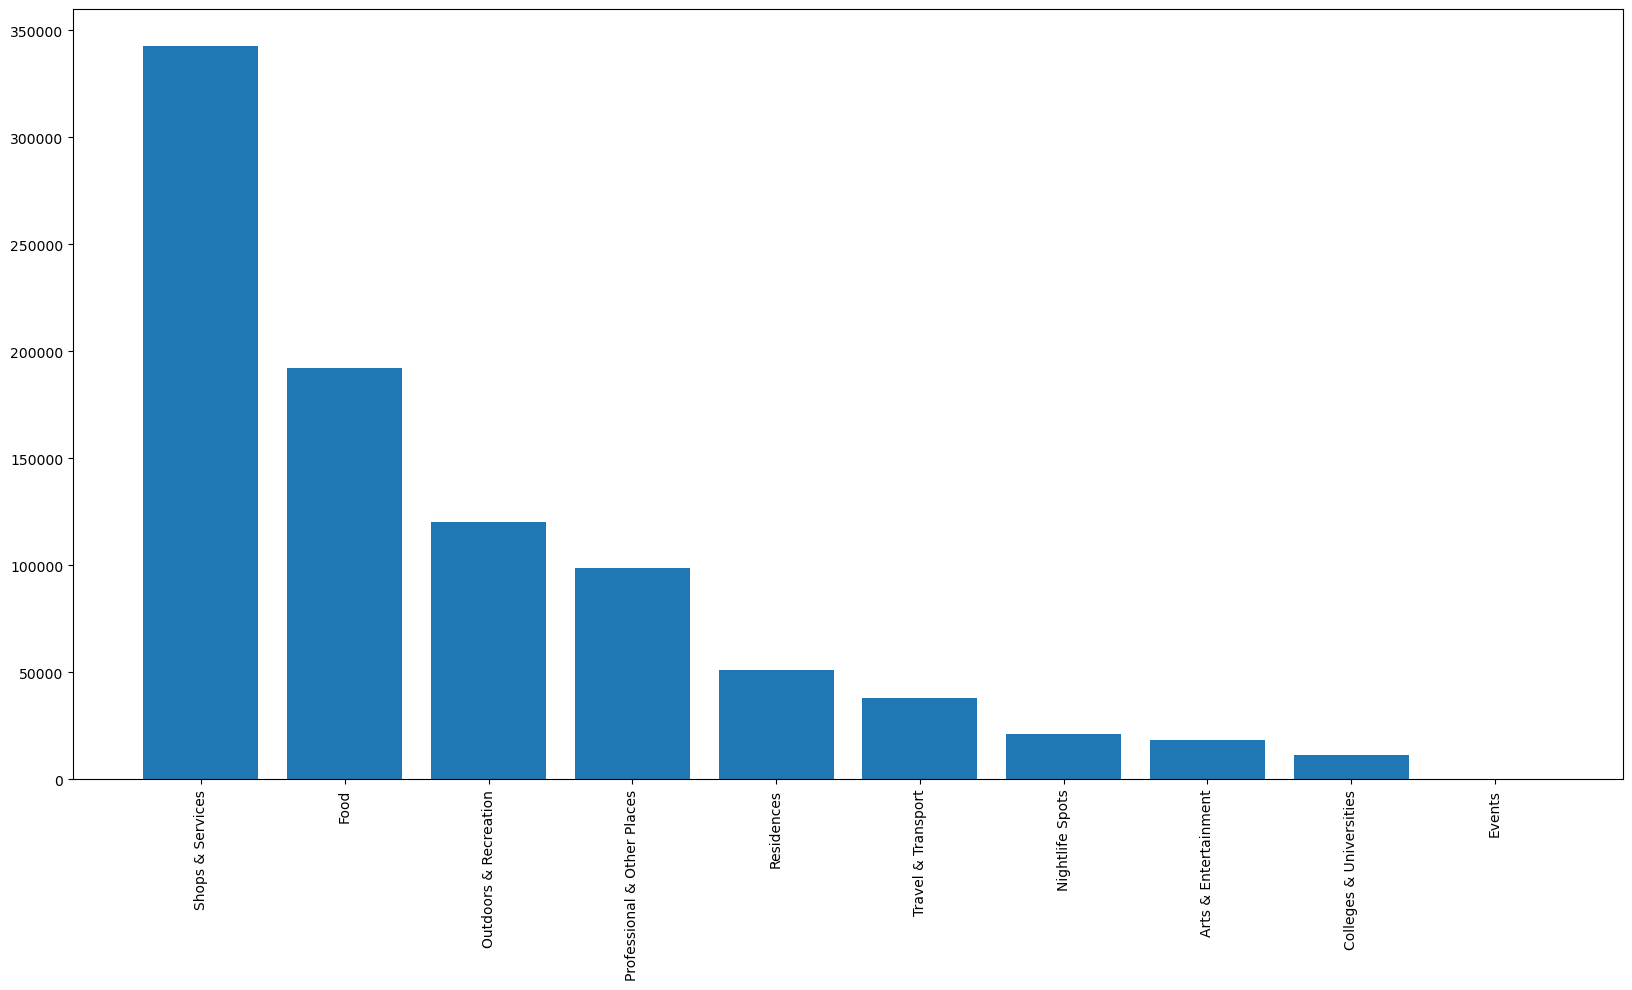

In [33]:
august_df = pd.read_csv('RVF_ATX_PID_HZ-2020-08.tsv', sep='\t')
get_location_distribution(august_df)